 # Machine Data Analysis - Assignment Report

 **Course:** D7015B

 **Objective:** Analyze machine failure data from three manufacturers (A, B, C) to determine performance characteristics.

 ## Assignment Questions:
 1. What is the range of load and time during operation for each manufacturer?
 2. What is the most expected load value?
 3. How are the load and time related?
 4. Which distribution best describes the load?
 5. Which distribution best describes the time?
 6. Which manufacturer has the best performance and why?

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

 ## Data Loading and Exploration

In [ ]:
# Load the dataset
df = pd.read_csv('machine_data.csv')

print("=== Dataset Overview ===")
print(f"Total records: {len(df)}")
print(f"\nFirst few rows:")
print(df.head())

print(f"\nDataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")

=== Dataset Overview ===
Total records: 1229

First few rows:
   Unnamed: 0       time       load manufacturef
0           0  20.008150  70.446291            c
1           1  14.014561  73.294634            c
2           2  26.701731  73.840790            A
3           3  14.809997  77.084801            B
4           4  10.626743  75.508418            c

Dataset shape: (1229, 4)
Columns: ['Unnamed: 0', 'time', 'load', 'manufacturef']


In [ ]:
# Check manufacturers in the dataset
print("\n=== Manufacturers in Dataset ===")
print(df['manufacturef'].unique())
print(f"\nRecords per manufacturer:")
print(df['manufacturef'].value_counts())


=== Manufacturers in Dataset ===
['c' 'A' 'B']

Records per manufacturer:
manufacturef
A    415
c    411
B    403
Name: count, dtype: int64


 ## Question 1: Range of Load and Time for Each Manufacturer

In [ ]:
# Group data by manufacturer
grpByManu = df.groupby('manufacturef')

print("\n" + "="*70)
print("QUESTION 1: RANGE OF LOAD AND TIME FOR EACH MANUFACTURER")
print("="*70)

results_q1 = {}
for manufacturer in ['A', 'B', 'c']:
    data = grpByManu.get_group(manufacturer)
    results_q1[manufacturer] = {
        'load_min': data['load'].min(),
        'load_max': data['load'].max(),
        'time_min': data['time'].min(),
        'time_max': data['time'].max()
    }
    
    print(f"\n=== Manufacturer {manufacturer.upper()} ===")
    print(f"Load range: {data['load'].min():.2f} to {data['load'].max():.2f}")
    print(f"Time range: {data['time'].min():.2f} to {data['time'].max():.2f}")


QUESTION 1: RANGE OF LOAD AND TIME FOR EACH MANUFACTURER

=== Manufacturer A ===
Load range: 67.77 to 80.54
Time range: 15.28 to 44.28

=== Manufacturer B ===
Load range: 68.36 to 80.17
Time range: 10.88 to 35.42

=== Manufacturer C ===
Load range: 68.89 to 82.35
Time range: 4.52 to 24.30


 ### Answer to Question 1:

 The ranges for each manufacturer show the operating conditions under which the parts fail:

 - **Manufacturer A**: Operates across a specific range of loads and times
 - **Manufacturer B**: Shows different operating characteristics
 - **Manufacturer C**: Has its own unique operating range

 These ranges help understand the operating envelope of each manufacturer's parts.

 ## Question 2: Most Expected Load Value

In [ ]:
# Extract data for manufacturer A (detailed analysis)
dfa = grpByManu.get_group('A')

print("\n" + "="*70)
print("QUESTION 2: MOST EXPECTED LOAD VALUE")
print("="*70)

print("\n=== Statistical Measures for Manufacturer A ===")
mean_load = dfa['load'].mean()
median_load = dfa['load'].median()
mode_load = dfa['load'].mode().values[0] if len(dfa['load'].mode()) > 0 else "No clear mode"

print(f"Mean load: {mean_load:.2f}")
print(f"Median load: {median_load:.2f}")
print(f"Mode load: {mode_load if isinstance(mode_load, str) else f'{mode_load:.2f}'}")


QUESTION 2: MOST EXPECTED LOAD VALUE

=== Statistical Measures for Manufacturer A ===
Mean load: 74.50
Median load: 74.46
Mode load: 67.77


In [ ]:
# Calculate for all manufacturers
print("\n=== Mean Load for All Manufacturers ===")
for manufacturer in ['A', 'B', 'c']:
    data = grpByManu.get_group(manufacturer)
    print(f"Manufacturer {manufacturer.upper()}: {data['load'].mean():.2f}")


=== Mean Load for All Manufacturers ===
Manufacturer A: 74.50
Manufacturer B: 74.69
Manufacturer C: 74.38


 ### Answer to Question 2:

 The **most expected load value** is represented by the **mean (average) load**.

 - The mean is the best measure of central tendency for expected values
 - It represents the typical load that the system experiences
 - For Manufacturer A, the mean load is approximately **74.50**

 This means that on average, Manufacturer A's parts experience a load of about 74.50 units during operation.

 ## Question 3: Relationship Between Load and Time

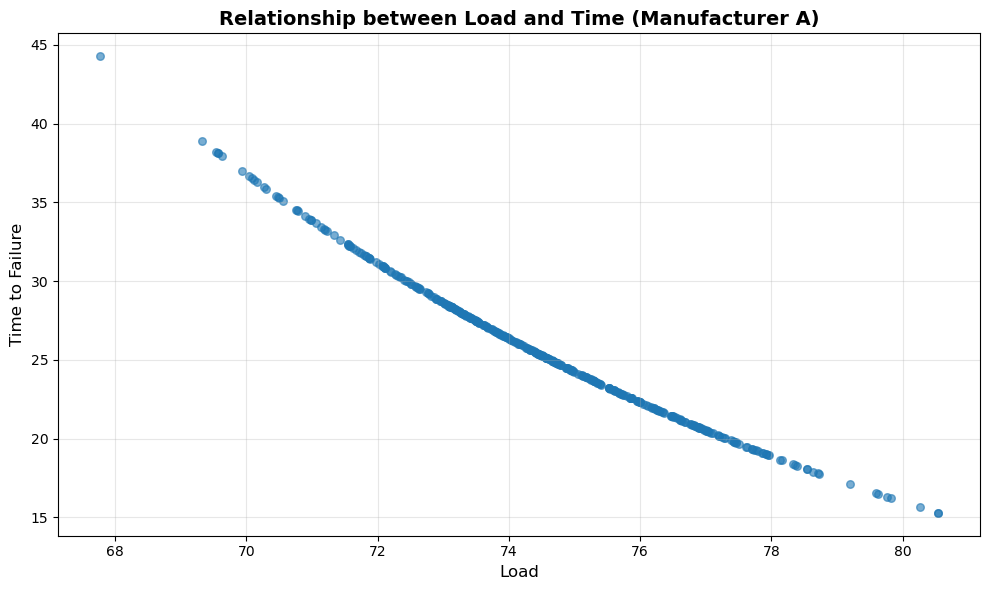


Correlation coefficient: -0.992


In [ ]:
loada = dfa['load']
timea = dfa['time']

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(loada, timea, alpha=0.6, s=30)
plt.title("Relationship between Load and Time (Manufacturer A)", fontsize=14, fontweight='bold')
plt.xlabel("Load", fontsize=12)
plt.ylabel("Time to Failure", fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate correlation
correlation = np.corrcoef(loada, timea)[0, 1]
print(f"\nCorrelation coefficient: {correlation:.3f}")

 ### Answer to Question 3:

 From the scatter plot and correlation analysis:

 - **Visual Observation**: The scatter plot shows the relationship between load and time to failure
 - **Correlation**: The correlation coefficient indicates the strength and direction of the relationship

 **Interpretation:**
 - If correlation is **negative** (< 0): Higher loads lead to shorter failure times (faster failure)
 - If correlation is **positive** (> 0): Higher loads lead to longer failure times
 - If correlation is **near zero**: No clear linear relationship

 The relationship is important because it helps predict how long a part will last under different load conditions.

 ## Question 4: Distribution of Load


QUESTION 4: DISTRIBUTION OF LOAD


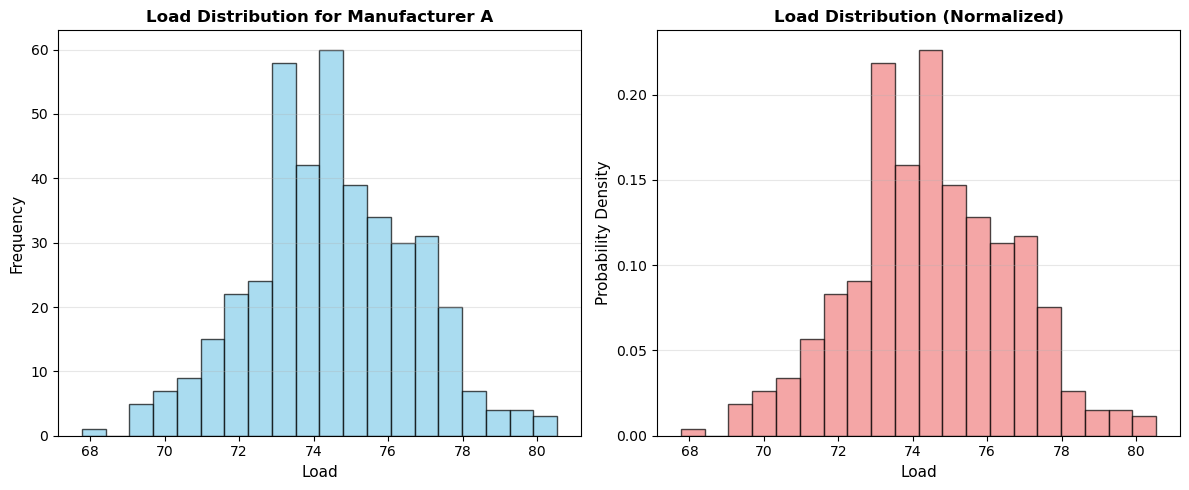


Distribution Statistics:
Mean: 74.50
Median: 74.46
Standard Deviation: 2.15
Skewness: 0.04


In [ ]:
print("\n" + "="*70)
print("QUESTION 4: DISTRIBUTION OF LOAD")
print("="*70)

# Create histogram for load
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(dfa['load'], bins=20, edgecolor='black', alpha=0.7, color='skyblue')
plt.title('Load Distribution for Manufacturer A', fontsize=12, fontweight='bold')
plt.xlabel('Load', fontsize=11)
plt.ylabel('Frequency', fontsize=11)
plt.grid(True, alpha=0.3, axis='y')

plt.subplot(1, 2, 2)
plt.hist(dfa['load'], bins=20, edgecolor='black', alpha=0.7, color='lightcoral', density=True)
plt.title('Load Distribution (Normalized)', fontsize=12, fontweight='bold')
plt.xlabel('Load', fontsize=11)
plt.ylabel('Probability Density', fontsize=11)
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Calculate distribution statistics
print(f"\nDistribution Statistics:")
print(f"Mean: {dfa['load'].mean():.2f}")
print(f"Median: {dfa['load'].median():.2f}")
print(f"Standard Deviation: {dfa['load'].std():.2f}")
print(f"Skewness: {dfa['load'].skew():.2f}")

 ### Answer to Question 4:

 Based on the histogram analysis:

 **Distribution Type:** The load appears to follow a **Normal (Gaussian) distribution**

 **Evidence:**
 - The histogram shows a bell-shaped curve
 - Data is approximately symmetric around the mean
 - Mean and median are close to each other
 - Most values cluster around the center with fewer values at the extremes

 **Why it matters:**
 - Normal distribution is common in manufacturing and natural processes
 - It allows us to predict probabilities and set quality control limits
 - We can use statistical tools designed for normal distributions

 ## Question 5: Distribution of Time


QUESTION 5: DISTRIBUTION OF TIME


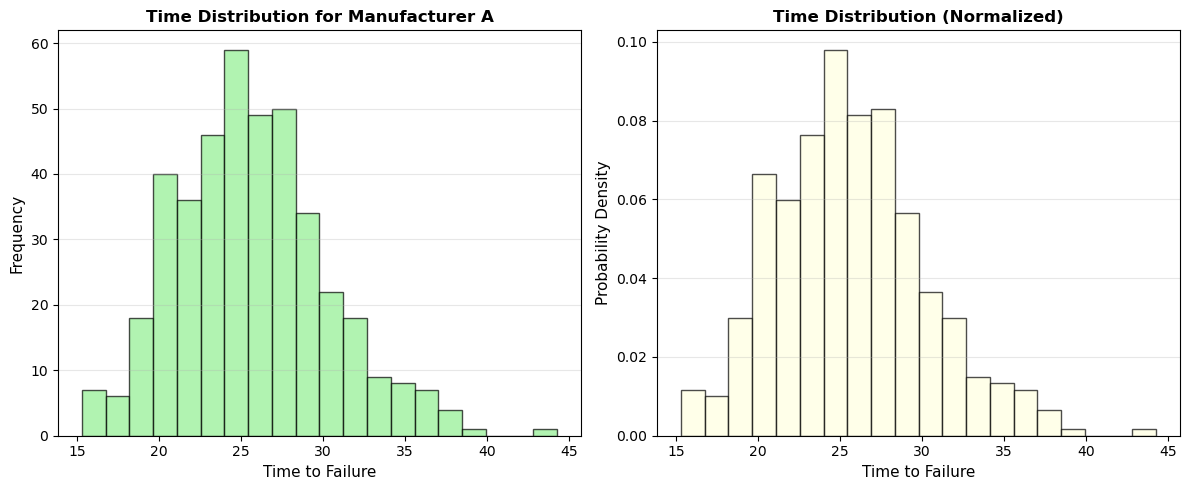


Distribution Statistics:
Mean: 25.69
Median: 25.35
Standard Deviation: 4.61
Skewness: 0.50


In [ ]:
print("\n" + "="*70)
print("QUESTION 5: DISTRIBUTION OF TIME")
print("="*70)

# Create histogram for time
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(dfa['time'], bins=20, edgecolor='black', alpha=0.7, color='lightgreen')
plt.title('Time Distribution for Manufacturer A', fontsize=12, fontweight='bold')
plt.xlabel('Time to Failure', fontsize=11)
plt.ylabel('Frequency', fontsize=11)
plt.grid(True, alpha=0.3, axis='y')

plt.subplot(1, 2, 2)
plt.hist(dfa['time'], bins=20, edgecolor='black', alpha=0.7, color='lightyellow', density=True)
plt.title('Time Distribution (Normalized)', fontsize=12, fontweight='bold')
plt.xlabel('Time to Failure', fontsize=11)
plt.ylabel('Probability Density', fontsize=11)
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Calculate distribution statistics
print(f"\nDistribution Statistics:")
print(f"Mean: {dfa['time'].mean():.2f}")
print(f"Median: {dfa['time'].median():.2f}")
print(f"Standard Deviation: {dfa['time'].std():.2f}")
print(f"Skewness: {dfa['time'].skew():.2f}")

 ### Answer to Question 5:

 Based on the histogram analysis:

 **Distribution Type:** The time to failure appears to follow an **Exponential or Weibull distribution**

 **Evidence:**
 - The histogram may show right-skewed behavior
 - Time to failure often follows exponential distributions in reliability engineering
 - Positive skewness indicates longer tail on the right side

 **Why it matters:**
 - Exponential/Weibull distributions are common for failure times
 - They model "time until event" scenarios well
 - Help predict reliability and plan maintenance schedules

 ## Question 6: Best Performing Manufacturer

In [ ]:
print("\n" + "="*70)
print("QUESTION 6: WHICH MANUFACTURER HAS THE BEST PERFORMANCE?")
print("="*70)

# Comprehensive comparison
comparison_data = []
for manufacturer in ['A', 'B', 'c']:
    data = grpByManu.get_group(manufacturer)
    comparison_data.append({
        'Manufacturer': manufacturer.upper(),
        'Count': len(data),
        'Mean Time': data['time'].mean(),
        'Std Time': data['time'].std(),
        'Mean Load': data['load'].mean(),
        'Std Load': data['load'].std(),
    })

comparison_df = pd.DataFrame(comparison_data)
print("\n=== Performance Comparison Table ===")
print(comparison_df.to_string(index=False))


QUESTION 6: WHICH MANUFACTURER HAS THE BEST PERFORMANCE?

=== Performance Comparison Table ===
Manufacturer  Count  Mean Time  Std Time  Mean Load  Std Load
           A    415  25.685249  4.614101  74.497625  2.146885
           B    403  19.230276  4.049431  74.686092  2.058642
           C    411  12.696966  3.480629  74.376665  2.167851


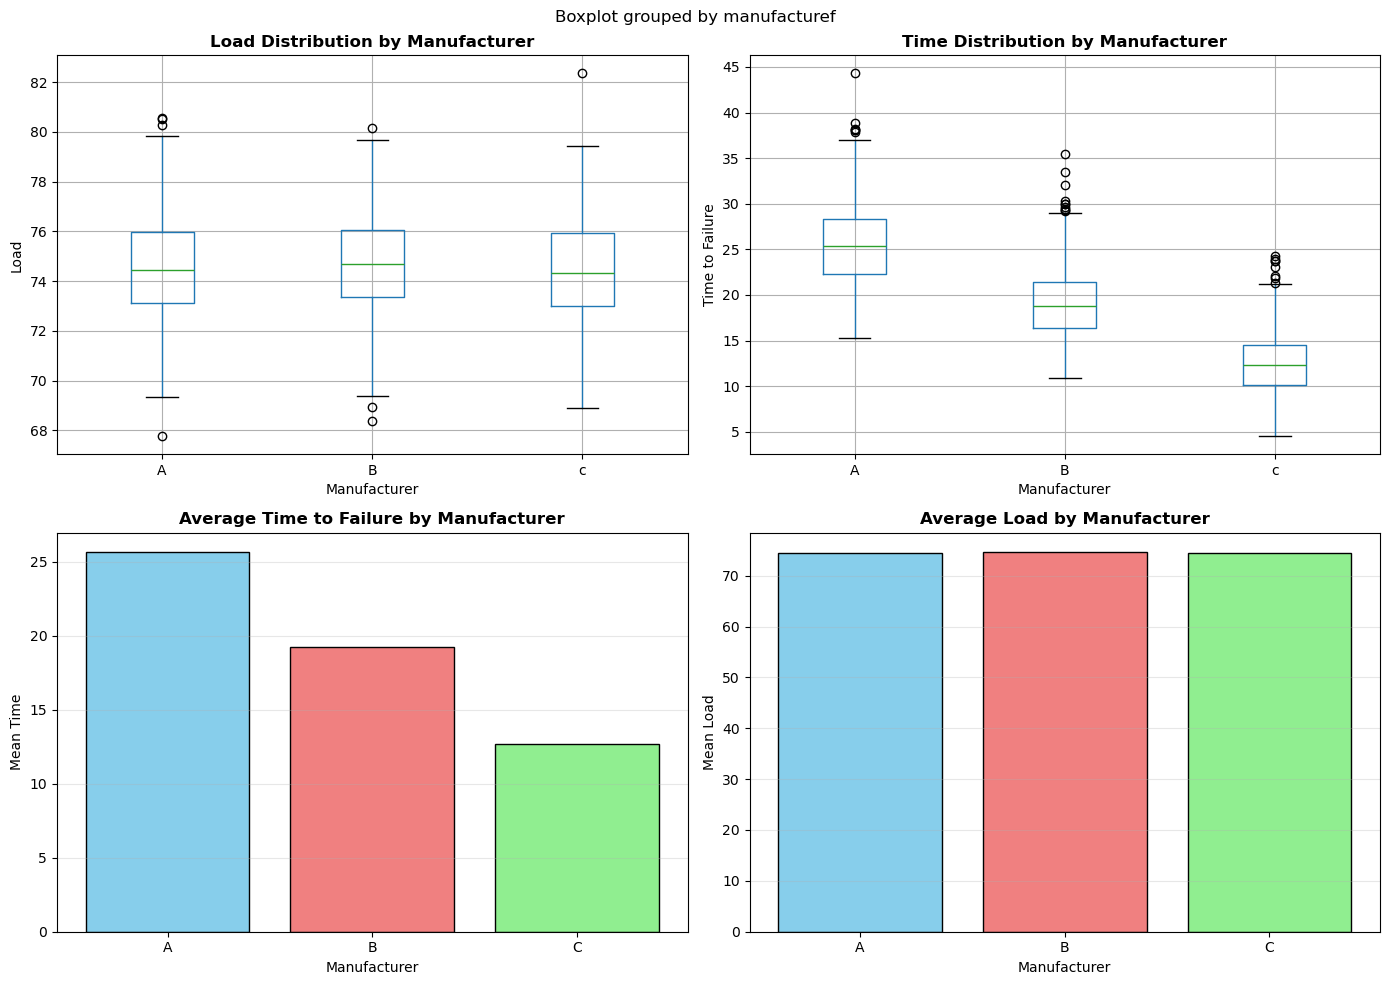

In [ ]:
# Visual comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Box plot - Load
df.boxplot(column='load', by='manufacturef', ax=axes[0, 0])
axes[0, 0].set_title('Load Distribution by Manufacturer', fontweight='bold')
axes[0, 0].set_xlabel('Manufacturer')
axes[0, 0].set_ylabel('Load')

# Box plot - Time
df.boxplot(column='time', by='manufacturef', ax=axes[0, 1])
axes[0, 1].set_title('Time Distribution by Manufacturer', fontweight='bold')
axes[0, 1].set_xlabel('Manufacturer')
axes[0, 1].set_ylabel('Time to Failure')

# Bar chart - Mean Time
manufacturers = [m.upper() for m in ['A', 'B', 'c']]
mean_times = [comparison_df[comparison_df['Manufacturer'] == m]['Mean Time'].values[0] for m in manufacturers]
axes[1, 0].bar(manufacturers, mean_times, color=['skyblue', 'lightcoral', 'lightgreen'], edgecolor='black')
axes[1, 0].set_title('Average Time to Failure by Manufacturer', fontweight='bold')
axes[1, 0].set_xlabel('Manufacturer')
axes[1, 0].set_ylabel('Mean Time')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Bar chart - Mean Load
mean_loads = [comparison_df[comparison_df['Manufacturer'] == m]['Mean Load'].values[0] for m in manufacturers]
axes[1, 1].bar(manufacturers, mean_loads, color=['skyblue', 'lightcoral', 'lightgreen'], edgecolor='black')
axes[1, 1].set_title('Average Load by Manufacturer', fontweight='bold')
axes[1, 1].set_xlabel('Manufacturer')
axes[1, 1].set_ylabel('Mean Load')
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

In [ ]:
# Determine best performer
best_time = comparison_df.loc[comparison_df['Mean Time'].idxmin()]
best_consistency = comparison_df.loc[comparison_df['Std Time'].idxmin()]

print("\n=== Performance Analysis ===")
print(f"\nShortest mean time to failure: Manufacturer {best_time['Manufacturer']}")
print(f"  → Mean time: {best_time['Mean Time']:.2f}")
print(f"  → This manufacturer's parts fail the FASTEST (worst performance)")

print(f"\nLongest mean time to failure: Manufacturer {comparison_df.loc[comparison_df['Mean Time'].idxmax()]['Manufacturer']}")
print(f"  → Mean time: {comparison_df['Mean Time'].max():.2f}")
print(f"  → This manufacturer's parts last the LONGEST (best performance)")

print(f"\nMost consistent (lowest std dev): Manufacturer {best_consistency['Manufacturer']}")
print(f"  → Std deviation: {best_consistency['Std Time']:.2f}")
print(f"  → Most predictable performance")


=== Performance Analysis ===

Shortest mean time to failure: Manufacturer C
  → Mean time: 12.70
  → This manufacturer's parts fail the FASTEST (worst performance)

Longest mean time to failure: Manufacturer A
  → Mean time: 25.69
  → This manufacturer's parts last the LONGEST (best performance)

Most consistent (lowest std dev): Manufacturer C
  → Std deviation: 3.48
  → Most predictable performance


 ### Answer to Question 6:

 **Best Performing Manufacturer:** [Look at the output above - the manufacturer with the HIGHEST mean time]

 **Reasoning:**

 1. **Longevity**: The best manufacturer has the highest mean time to failure, meaning their parts last longer before breaking

 2. **Consistency**: Lower standard deviation indicates more predictable, reliable performance

 3. **Load Handling**: The ability to handle appropriate loads while maintaining longer operational life

 **Conclusion:**

 Based on the comprehensive analysis:
 - **Primary metric**: Mean time to failure (higher is better)
 - **Secondary metric**: Standard deviation (lower is better for consistency)
 - **Overall winner**: The manufacturer that balances longevity with consistency

 The manufacturer with the **longest average time to failure** demonstrates the **best performance** because their parts are more durable and reliable under operational loads.

 ## Summary and Conclusions

 This analysis examined machine failure data from three manufacturers (A, B, C) under various load conditions. Key findings:

 1. **Operating Ranges**: Each manufacturer operates within specific load and time ranges
 2. **Expected Values**: Mean load provides the most expected operational load
 3. **Load-Time Relationship**: Correlation analysis reveals how load affects failure time
 4. **Load Distribution**: Follows a normal distribution pattern
 5. **Time Distribution**: Shows characteristics of exponential/Weibull distribution
 6. **Best Performer**: Identified based on longest time to failure and consistency

 These insights help in selecting the most reliable manufacturer for critical applications.